# Capítulo 1. Panorámica del Machine Learning

[Link a GitHub](https://github.com/ageron/handson-ml)

# Indice

+ [¿Qué es Machine Learning?](#Qué-es-Machine-Learning)
+ [¿Por qué usar Machine Learning?](#Por-qué-usar-Machine-Learning)
+ [Tipos de Sistemas de Machine Learning](#Tipos-de-Sistemas-de-Machine-Learning)
 + [Aprendizaje supervisado/no supervisado](#Aprendizaje-supervisado-no-supervisado)
   + [Aprendizaje supervisado](#Aprendizaje-supervisado)
   + [Aprendizaje no supervisado](#Aprendizaje-no-supervisado)
   + [Aprendizaje semisupervisado](#Aprendizaje-semisupervisado)
   + [Aprendizaje por reforzamiento](#Aprendizaje-por-reforzamiento)
 + [Aprendizaje por lotes y online](#Aprendizaje-por-lotes-y-online)
   + [Aprendizaje por lotes](#Aprendizaje-por-lotes)
   + [Aprendizaje online](#Aprendizaje-online)
 + [Aprendizaje basado en instancia versus basado en modelo](#Aprendizaje-instancia-vs-modelo)
   + [Aprendizaje basado en instancia](#Aprendizaje-basado-en-instancia)
   + [Aprendizaje basado en modelo](#Aprendizaje-basado-en-modelo)
+ [Principales desafíos del Machine Learning](#Principales-desafíos-del-Machine-Learning)
  + [Cantidad insuficiente de datos de entrenamiento](#Cantidad-insuficiente-de-datos-de-entrenamiento)
  + [Datos de entrenamiento no representativos](#Datos-de-entrenamiento-no-representativos)
  + [Datos de pobre calidad](#Datos-de-pobre-calidad)
  + [Características irrelevantes](#Características-irrelevantes)
  + [Sobreajuste de los datos de entrenamiento](#Sobreajuste-de-los-datos-de-entrenamiento)
  + [Subajuste de los datos de entrenamiento](#Subajuste-de-los-datos-de-entrenamiento)
  + [Un paso atrás](#Un-paso-atrás)
+ [Prueba y validación](#Prueba-y-validación)
  + [Ajuste de hiperparámetros y selección de modelo](#Ajuste-de-hiperparámetros-y-selección-de-modelo)
  + [Desajuste de datos](#Desajuste-de-datos)

Cuando la mayoría de las personas escuchan "Machine Learning", se imaginan un robot: un mayordomo fiel o un Terminator mortal, dependiendo de a quién se le pregunte. Pero Machine Learning no es solo una fantasía futurista, ya está aquí. De hecho, ha existido durante décadas en algunas aplicaciones especializadas, como el *reconocimiento óptico de caracteres* (OCR). Pero la primera aplicación de ML que realmente se convirtió en popular, mejorando la vida de cientos de millones de personas, surgió en el mundo en la década de 1990: era el *filtro de spam*. No es exactamente un Skynet consciente de sí mismo, pero técnicamente se puede calificar como aprendizaje automático (en realidad, ha aprendido tan bien que ya no es necesario marcar un correo electrónico como spam).

Le siguieron cientos de aplicaciones de ML que ahora funcionan silenciosamente con cientos de productos y funciones que usamos regularmente, desde recomendaciones de productos hasta búsqueda por voz. ¿Dónde comienza y dónde termina el aprendizaje automático? ¿Qué significa exactamente que una máquina *aprenda* algo? Si descargo una copia de Wikipedia, ¿mi computadora realmente "aprendió" algo? ¿De repente es más inteligente? En este capítulo comenzaremos aclarando qué es el aprendizaje automático y por qué es posible que quiera utilizarlo.

Luego, antes de comenzar a explorar el continente de Machine Learning, echaremos un vistazo al mapa y aprenderemos sobre las principales regiones y los hitos más notables: aprendizaje supervisado versus no supervisado, aprendizaje en línea versus aprendizaje por lotes, aprendizaje basado en instancias versus aprendizaje basado en modelos. Luego veremos el flujo de trabajo de un proyecto típico de ML, discutiremos los principales desafíos que puede enfrentar y cubriremos cómo evaluar y ajustar un sistema de Machine Learning.

Este capítulo presenta muchos conceptos fundamentales (y jerga) que todo científico de datos debe saber de memoria. Será una descripción general de alto nivel (el único capítulo sin mucho código), todo bastante simple, pero debe asegurarse de que todo esté cristalino antes de continuar con el resto del libro. ¡Así que tome un café y comencemos!

## ¿Qué es Machine Learning? <a name="Qué-es-Machine-Learning"></a>

Machine Learning es la ciencia (y arte) de programar ordenadores para que puedan *aprender de los datos*.

Esta es una definición ligeramente más general:

> *Machine learning es el campo de estudio que proporciona a los ordenadores la habilidad de aprender sin ser explícitamente programados (Arthur Samuel, 1959)*

Y otra más orientada a la ingeniería:

> *Un programa de ordenador se dice que aprende de una experiencia E con respecto a alguna tarea T y alguna medida de la ejecución P, si su ejecución en T, medida por P, mejora con la experiencia E. (Tom Mitchell, 1997)*

Por ejemplo, tu filtro de spam es un programa de Machine Learning que puede aprender a marcar spam dados ejemplos de emails de spam (por ejemplo, marcados por usuarios) y ejemplos de emails normales (no spam, también llamados "*ham*"). Los ejemplos que el sistema usa para aprender son llamados *conjunto de entrenamiento* (*training set* o *sample*). En ese caso, la tarea T es marcar como spam nuevos mails, la experiencia E son los *datos de entrenamiento* y la medida de la ejecución P necesita ser definida. Por ejemplo, podemos usar el ratio de emails clasificados correctamente. Esta medida particular de la ejecución es llamada *precisión* (*accuracy*) y es utilizada a menudo en las tareas de clasificación.

Si solo descargamos una copia de Wikipedia nuestro ordenador tiene muchos más datos, pero no es de repente mejor en ninguna tarea. Por lo tanto, no es Machine Learning.

## ¿Por qué usar Machine Learning? <a name="Por-qué-usar-Machine-Learning"></a>

Consideremos cómo se podría escribir un filtro de spam usando técnicas de programación tradicionales:

1. Primero echaríamos un vistazo a cómo es típicamente el spam. Podemos notar que algunas palabras o frases (como por ejemplo "para ti", "tarjeta de crédito", "gratis" e "increible") tienden a aparecer mucho en el asunto. Quizás podríamos notar algunos otros patrones en el nombre del remitente, en el cuerpo del correo, etc.

2. Escribiríamos un algoritmo de detección para cada uno de los patrones que has descubierto y el programa marcaría emails como spam si se detectan varios de estos patrones.

3. Probaríamos el programa y repetiríamos los pasos 1 y 2 hasta que fuera los suficientemente bueno.

![spam_traditional](images/ch01/spam_traditional.png)

Dado que el problema no es trivial, nuestro programa se convertirá en un largo listado de complejas reglas, bastante difícil de mantener.

En contraste, un filtro de spam basado en técnicas de Machine Learning aprende automáticamente qué palabras y frases son buenos predictores del spam, detectando patrones de palabras inusualmente frecuentes en los ejemplos de spam en comparación con ejemplos normales. El programa es mucho más corto, fácil de mantener y probablemente más preciso.

![spam_ml](images/ch01/spam_ml.png)

Además, si los spammers advierten que todos sus emails conteniendo la palabra "gratis" son bloqueados, podrían empezar a escribir en su lugar "gratuito". Un filtro de spam usando técnicas de programación tradicional necesitaría ser actualizado para marcar los emails con la palabra "gratuito". Si los spammer siguen trabajando, deberá seguir escribiendo nuevas reglas para siempre. Por el contrario, un filtro de spam basado en técnicas de Machine Learning advertirá automáticamente que "gratuito" se ha convertido inusualmente frecuente en el correo spam por los usuarios y los marcará sin tu intervención.

![spam_ml_adapt](images/ch01/spam_ml_adapt.png)

Otro área donde brilla el Machine Learning es en aquellos problemas demasiado comnplejos para los enfoques tradicionales o donde no disponemos de un algoritmo. Por ejemplo, consideremos el reconocimiento del habla: digamos que queremos empezar escribiendo un simple programa que distinga las palabras "uno" y "dos". Podríamos codificar un algoritmo que mida la intensidad del sonido y sepa distinguir los unos de los doses. Obviamente esta técnica no escalará a miles de palabras habladas por millones de personas muy diferentes en entornos ruidosos y en docenas de lenguajes. La mejor solución (al menos hoy) es escribir un algoritmo que aprenda por sí mismo, proporcionádole muchos ejemplos de cada palabra.

Finalmente, Machine Learning puede ayudar a los humanos a aprender: los algoritmos de ML pueden inspeccionarse para ver lo que han aprendido (aunque para algunos algoritmos esto puede ser complicado). Por ejemplo, una vez que el filtro de spam ha sido entrenado con suficiente spam puede ser inspeccionado fácilmente para revelar la lista de palabras y las combinaciones de éstas que cree que son los mejores predictores de spam. Algunas veces esto revelará relaciones insospechadas o nuevas tendencias y, por lo tanto, nos conducirá a una mejor comprensión del problema.

La aplicación de técnica de ML para profundizar en grandes cantidades de datos pueden ayudar a descubrir patrones que no eran evidentes de inmediato. Esto es llamado *minería de datos* (*data mining*)

![ml_data_mining](images/ch01/ml_data_mining.png)

En resumen, Machine Learning es ideal para:

- Problemas donde las soluciones existentes requieran de mucho ajuste manual o grandes listas de reglas: un algoritmo de Machine Learning a menudo puede simplificar el código y una mejor ejecución.
- Problemas complejos donde no existe una buena solución usando enfoques tradicionales: las mejores técnicas de Machine Learning pueden encontrar una solución.
- Entornos cambiantes: un sistema de Machine Learning puede adaptarse a los nuevos datos.
- Obtener revelaciones sobre problemas complejos y grandes cantidades de datos.

## Tipos de Sistemas de Machine Learning

Hay muchos tipos diferentes de sistemas de Machine Learning que son útiles para clasificarlos en amplias categorías que son:

- Si son o no entrenados con supervisión humana (supervisados, no supervisados, semisupervisados y aprendizaje por reforzamiento)
- Si pueden o no aprender incrementalmente al vuelo (aprendizaje online versus por lotes)
- Si pueden o no trabajar simplemente comparando nuevos puntos de datos para conocer nuevos puntos de datos, en lugar de detectar patrones en los datos de entrenamiento y construir un modelo predictivo, al igual que hacen los científicos (aprendizaje basado en instancia versus basado en modelos)

Estos criterios no son excluyentes; puedes combinarlos de la forma que se quiera. Por ejemplo, un filtro de spam de última generación puede aprender al vuelo usando un modelo de red neuronal profunda entrenada usando ejemplos de spam y no spam, lo que lo convierte en un sistema de aprendizaje supervisado online basado en modelo.

Veamos cada uno de estos criterios un poco más de cerca.

### Aprendizaje supervisado/no supervisado <a name="Aprendizaje-supervisado-no-supervisado"></a>

Los sistemas de Machine Learning pueden clasificarse según la cantidad y el tipo de supervisión que reciben durante el entrenamiento. Existen cuatro grandes categorías: aprendizaje supervisado, aprendizaje no supervisado, aprendizaje semisupervisado y aprendizaje por reforzamiento.

#### Aprendizaje supervisado

En el aprendizaje supervisado, los datos de entrenamiento que se proporcionan al algoritmo incluyen las soluciones deseadas, llamadas *etiquetas* (*labels*).

![ml_supervised_labeled](images/ch01/ml_supervised_labeled.png)

Una tarea típica del aprendizaje supervisado es la *clasificación*. El filtro de spam es un buen ejemplo: es entrenado con muchos mails de ejemplo con su *clase* (spam o no spam) y debe aprender cómo clasificar los nuevos emails.

Otra típica tarea es predecir un valor numérico *objetivo* (*target*), como puede ser el precio de un coche, dadas una serie de *características* (*features*) (kilometraje, antiguedad, marca, etc.) llamadas *predictores* (*predictors*). Este tipo de tarea se llama *regresión*. Para entrenar al sistema se necesita proporcionar muchos ejemplos de coches, incluyendo tanto los predictores como sus etiquetas (por ejemplo, sus precios).

> Dato curioso sobre la regresión: este extraño nombre es un término estadístico introducido por Francis Galton mientras estudiaba el hecho de que los hijos de personas altas tienden a ser más bajos que sus padres. Como los niños eran más bajos, llamó a esta *regresión a la media*. Este nombre se aplicó luego a los métodos que utilizó para analizar las correlaciones entre las variables.

En Machine Learning un *atributo* es un tipo de dato (por ejemplo, el kilometraje), mientras que una *característica* tiene varios significados dependiendo del contexto, pero generalmente significa un atributo más su valor (por ejemplo, "kilometraje = 15.000"). Sin embargo, muchas personas usan la palabra *atributo* y *característica* de forma equivalente.

![regresion](images/ch01/regresion.png)

Tengamos en cuenta que algunos algoritmos de regresión pueden ser usados también para la clasificación y viceversa. Por ejemplo, la *regresión logística* se usa comunmente para la clasificación, ya que puede generar un valor que corresponde a la probabilidad de pertenecer a una clase dada (por ejemplo, 20% de probabilidad de ser spam).

Aquí tenemos algunos de los algoritmos de aprendizaje supervisado más importantes:

+ k-Vecinos más cercanos (*k-Nearest Neighbors*)
+ Regresión Lineal
+ Regresión Logística
+ Maquinas de Soporte Vectorial (*Support Vector Machines* - SVM)
+ Arboles de decisión y Bosques Aleatorios (*Decision Trees / Random Forests*)
+ Redes neuronales

> Algunas arquitecturas de redes neuronales pueden ser no supervisadas, tales como las máquinas autocodificadoras y restringidas de Bolzmann. También pueden ser semisupervisadas como en las redes de creencia profundas y pre-entrenamiento no supervisado.

#### Aprendizaje no supervisado

En el *aprendizaje no supervisado*, como se puede suponer, los datos de entrenamiento no están etiquetados. El sistema intenta aprender sin un profesor.

![ml_no_supervised](images/ch01/ml_no_supervised.png)

Aquí hay algunos de los más importantes algoritmos de aprendizaje no supervisado:

+ Clustering
 + k-Means
 + DBSCAN
 + Análisis jerárquico de agrupación - *Hierarchical Cluster Analysis (HCA)*
+ Detección de anomalías y detección de novedades
 + One-class SVM
 + Bosque de soledades (isolation forest)
+ Visualización y reducción de dimensionalidad
 + Análisis de componentes principales (PCA)
 + Kernel PCA
 + Embebido local lineal (*Locally-Linear Embedding* - LLE)
 + t-distributed Stochastic Neighbor Embedding (t-SNE)
+ Aprendizaje por regla de asociación
 + Apriori
 + Eclat
 
Por ejemplo, digamos que tenemos muchos datos sobre los visitantes de nuestro blog. Puede que queramos ejecutar un algoritmo de *agrupación* (clustering) para intentar detectar grupos de visitantes similares. En ningún momento se le dice al algoritmo a qué grupo pertenece un visitante: encuentra esas conexiones sin nuestra ayuda. Por ejemplo, puede notar que el 40% de los visitantes son hombres que les gustan los comics y leen generalmente nuestro blog por la noche, mientras que el 20% son jóvenes amantes de la ciencia ficción que lo visitan durante el fin de semana, y así sucesivamente. Si usamos un algoritmo de *agrupación jerárquico* podemos subdividir cada grupo en grupos más pequeños. Esto puede ayudarnos a orientar nuestros posts a cada grupo.

![clustering](images/ch01/clustering.png)

Los algoritmos de *visualización* también son buenos ejemplos de algoritmos de supervisión no supervisados: les proporcionas una gran cantidad de datos completos sin etiquetar y dan como resultado representaciones 2D o 3D de nuestros datos que pueden ser fácilmente visualizados. Estos algoritmos intentan preservar la mayor cantidad de estructura posible (tratando de evitar que los clusters de entrada se superpongan en la visualización), así podemos comprender cómo se organizan los datos y quizás identificar patrones insospechados.

A continuación se muestra un ejemplo de visualización t_SNE resaltando los clusters semánticos:

![t_sne](images/ch01/t_sne_visualization.png)

> Nótese cómo los animales están bastante bien separados de los vehículos, cómo los caballos están cerca de los ciervos pero lejos de las aves, etc.

Una tarea relacionada es la *reducción de la dimensionalidad*, en la cual el objetivo es simplificar los datos sin perder demasiada información. Una forma de hacer esto es fusionar varias características correlacionadas en una sola. Por ejemplo, el kilometraje de un coche puede estar muy correlacionado con su antiguedad, así que el algoritmo de reducción de la dimensionalidad las fusionará en una única característica que represente el desgaste del coche. Ha esto se denomina *extracción de características* (feature extraction).

A menudo resulta una buena idea intentar reducir la dimensión de nuestros datos de entrenamiento usando un algoritmo de reducción de la dimensionalidad antes de alimentar a otro algoritmo de Machine Learning (como puede ser un algoritmo de aprendizaje supervisado). Se ejecutará mucho más rápido, los datos ocuparán mucho menos espacio en memoria y disco y, el algunos casos, tendrá un mejor rendimiento.

Otra importante tarea no supervisada es la *detección de anomalías*. Por ejemplo, la detección de transacciones inusuales de tarjetas de crédito para prevenir el fraude, la detección de defectos de fabricación o la eliminación automática de valores atípicos de un base de datos antes de alimentar a otro algoritmo de aprendizaje. El sistema está entrenado con instancias normales y cuando ve una nueva instancia puede decir si parece normal o es probable que sea una anomalía.

![anomaly](images/ch01/anomaly.png)

Por último, otra tarea no supervisada común es el *aprendizaje por regla de asociación*, en el cual el objetivo es profundizar en una gran cantidad de datos y descubrir relaciones interesantes entre los atributos. Por ejemplo, supongamos que tenemos un supermercado. Ejecutar una regla de asociación en nuestros registros de ventas puede revelarnos que las personas que compran salsa barbacoa y patatas fritas también suelen comprar carne. Por lo tanto, es posible que queramos colocar estos productos cerca el uno del otro.

#### Aprendizaje semisupervisado

Algunos algoritmos pueden manejar datos de entrenamiento parcialmente etiquetados, normalmente muchos datos sin etiquetar y unos pocos datos etiquetados. Esto se llama *aprendizaje semisupervisado*.

Algunos servicios de hospedaje de fotos, como Google Photos, son buenos ejemplos de esto. Una vez que subes todas tus fotos familiares al servicio, reconoce automáticamente que la misma persona A aparece en las fotos 1, 5 y 11, mientras que otra persona B aparece en las fotos 2, 5 y 7. Esta es la parte no supervisada del algoritmo (clustering). Ahora todo lo que necesita el sistema es que le digamos quiénes son esas personas. Solo una etiqueta por persona y es capaz de nombrar a cada uno en cada foto, lo cual es útil en la búsqueda de fotos. \[*Esto es cuando el sistema trabaja perfectamente. En la práctica, a menudo crea unos pocos clusters por persona y algunas veces mezcla dos personas que parecen similares, así que necesita proporcionarles algunas etiquetas por persona y eliminar manualmente algunos clusters*].

![semisupervised](images/ch01/semisupervised.png)

La mayoría de los algoritmos semisupervisados son combinaciones de algoritmos supervisados y no supervisados. Por ejemplo, las *redes de creencia profundas (DBNs)* están basadas en componentes no supervisados llamados *redes restringidas de Boltzmann (RBMs)* apiladas una encima de la otra. Las RBMs son entrenadas secuencialmente de una forma no supervisada y posteriormente todo el sistema es ajustado usando técnicas de aprendizaje supervisado.

#### Aprendizaje por reforzamiento

El *aprendizaje por reforzamiento* es una bestia muy diferente. El sistema de aprendizaje, llamado *agente* en este contexto, puede observar el entorno, seleccionar y ejecutar acciones y obtener recompensas a cambio (o penalizaciones en forma de recompensas negativas, como se ven en la figura siguiente). Debe aprender entonces por si mismo la mejor estrategia, llamada *política*, para obtener la mayor recompensa con el tiempo. Una política define que acción debe elegir el agente cuando se encuentra en una situación dada.

![reinforcement](images/ch01/reinforcement.png)

Por ejemplo, muchos robots implementan algoritmos de aprendizaje por reforzamiento para aprender a caminar. El programa AlphaGo de DeepMind también es un buen ejemplo de Aprendizaje por Reforzamiento: saltó a los titulares en marzo de 2016 cuando venció al campeón del mundo Lee Sedo al juego de *Go*. Aprendió su política ganadora analizando millones de partidas y después jugando muchas partidas contra sí mismo. Téngase en cuenta que su aprendizaje se desactivó durante sus partidas contra el campeón. AlphaGo solo aplicó las políticas que había aprendido.

### Aprendizaje por lotes y online

Otro criterio usado para clasificar los sistemas de Machine Learning es si puede o no el sistema aprender incrementalmente a partir de un flujo de datos entrantes.

#### Aprendizaje por lotes

En el *aprendizaje por lotes* el sistema es incapaz de aprender incrementalmente: debe ser entrenado usando todos los datos disponibles. Generalmente esto tomará mucho tiempo y recursos de computación, así que normalmente se realiza offline. Primero se entrena el sistema y después de lanza en producción y se ejecuta sin más aprendizaje, sólo aplica lo aprendido. Esto se llama *aprendizaje offline*.

Si queremos que un sistema de aprendizaje por lotes aprenda nuevos datos (como por ejemplo un nuevo tipo de smap), necesitamos entrenar una nueva versión del sistema desde cero en el conjunto de datos completo (no solo los nuevos datos, sino también los antiguos), entonces paramos en anterior sistema y los reemplazamos por el nuevo.

Afortunadamente, el proceso global de entrenamiento, evaluación y lanzamiento de un sistema de Machine Learning se puede automatizar con bastante facilidad, por lo que incluso un sistema de aprendizaje por lotes puede adaptarse al cambio. Simplemente actualizamos los datos y entrenamos una nueva versión del sistema desde cero tantas veces como sea necesario.

Esta solución es simple y a menudo funciona bien, pero el entrenamiento con el conjunto de datos completo puede llevar muhas horas, así que normalmente solo se entranaría un nuevo sistema cada 24 horas o incluso semanalmente. Si el sistema debe adaptarse rápidamente a datos cambiantes (por ejemplo, para predecir precios de acciones) necesitaremos una solución más reactiva.

Además, el entrenamienmto sobre el conjunto de datos completo requieres de muchos recursos de computación (CPU, espacio de memoria, espacio de disco, disco I/O, red I/O, etc.). Si tenemos muchos datos y cada día automatizamos el sistema desde cero, terminará costando mucho dinero. Si la cantidad de datos es enorme, puede ser incluso imposible usar un algoritmo de aprendizaje por lotes.

Finalmente, si nuestro sistema necesita ser capaz de aprender autónomamente y tiene recursos limitados (por ejemplo, una aplicación de móvil o un vehículo en Marte), llevar grandes cantidades de datos y consumir muchos recursos para entrenar durante horas cada día es algo bloqueante.

Afortunadamente, en todos estos casos la mejor opción es usar algoritmos que son capaces de aprender incrementalmente.

#### Aprendizaje online

En el *aprendizaje online* entrenamos al sistema incrementalmente alimentando las instancias de datos secuencialmente, ya sea individualmente o en pequeños grupos llamados *mini-lotes*. Cada paso de aprendizaje es rápido y económico, así el sistema puede aprender nuevos datos al vuelo, tal como llegan.

![online_learning](images/ch01/online_learning.png)

El aprendizaje online es ideal para sistemas que reciben datos como un flujo continuo (por ejemplo, precios de acciones) y necesitan adaptarse rápidamente o autónomamente. También es una buena opción si tienes recursos computacionales limitados: una vez que un sistema online ha aprendido nuevas instancias de datos no las necesita más, asi que podemos descartarlas (a menos que queramos volver a un estado anterior y "reproducir" los datos). Esto puede ahorar una gran cantidad de espacio.

Los algoritmos de aprendizaje online también puede usarse para entrenar sistemas en grandes conjuntos de datos que no pueden entrenarse en la memoria principal de una máquina (este se llama aprendizaje *out-of-core*). El algoritmo carga parte de los datos, ejecuta una fase de entrenamiento con esos datos y repite el proceso hasta haber ejecutado todos los datos. Generalmente este proceso se realiza offline (por ejemplo, no en sistemas en vivo), por lo que *aprendizaje online* puede ser un nombre confuso. Piensa en ello como si fuera un *aprendizaje incremental*.

![online_learning_huge](images/ch01/online_learning_huge.png)

Un parámetro importante en los sistemas de aprendizaje online es cómo de rápido debe adaptarse a los datos cambiantes: esto se llama *ratio de aprendizaje*. Si se define un alto ratio de aprendizaje, el sistema se adaptará rápidamente a los nuevos datos, pero también tenderá a olvidar rápidamente los antiguos datos (no queremos que un filtro de spam marque sólo los últimos tipos de spam que mostró). A la inversa, si se define un bajo ratio de aprendizaje, el sistema tendrá más inercia, es decir, aprenderá más despacio pero será menos sensible al ruido en los datos nuevos o a secuencias de de puntos de datos no representativos.

Un gran desafío con el aprendizaje online es que si se proporcionan malos datos al sistema, el rendimiento del sistema disminuirá gradualmente. Si estamos hablando de un sistema en vivo, tus clientes lo notarán. Por ejemplo, los malos datos podrían provenir del malfuncionamiento de un sensor de un robot o de alguien que envía spam a un motor de búsqueda para intentar un ranking alto en los resultados de búsqueda. Para reducir este riesgo, necesitas monitorizar el sistema de cerca y desactivar rápidamente el aprendizaje (y posiblemente revertirlo a un estado de trabajo previo) si detectas una caída en el rendimiento. También podrías monitorizar los datos entrantes y reaccionar a los datos anormales (por ejemplo, usando algún algoritmo de detección de anomalías).

### Aprendizaje basado en instancia versus basado en modelo <a name="Aprendizaje-instancia-vs-modelo"></a>

Otra forma de categorizar los sistemas de Machine Learning es por cómo *generalizan*. La mayoría de las tareas de Machine Learning consisten en realizar predicciones. Esto significa que dados unos ejemplos de entrenamiento, el sistema necesita ser capaz de generalizar a otros ejemplos que nunca ha visto antes. Disponer de una buena medida del rendimiento en los datos de entrenamiento es bueno, pero no suficiente; el verdadero objetivo es un buen rendimiento en las nuevas instancias.

Existen dos enfoques principales a la generalización: aprendizaje basado en instancia y aprendizaje basado en modelo.

#### Aprendizaje basado en instancia

Posiblemente, la forma más trivial de aprendizaje es simplemente aprender de memoria. Si tienes que crear un filtro de spam de esta forma, solo marcaría aquellos emails que son idénticos a los emails que ya han marcado previamente los usuarios. No es la peor solución pero ciertamente no es la mejor.

En lugar de marcar solo los emails que son idénticos a los ya conocidos, nuestro filtro de spam se podría programar para marcar los emails que son muy similares a los conocidos. Esto requiere una *medida de la similitud* entre dos emails. Una medida muy básica de la similitud entre dos emails podría ser contar el número de palabras que tienen en común. El sistema podría marcar una email si tiene palabras en común con un email conocido marcado anteriormente.

Esto es llamado *aprendizaje basado en instancia*: los sistema aprenden ejemplos de memoria, después generalizan a nuevos casos usando medidas de similitud.

![instance_based](images/ch01/instance_based.png)



#### Aprendizaje basado en modelo

Otra forma de generalizar a partir de una conjuntos de ejemplos es construir un modelo de esos ejemplos y después usar dicho modelo para realizar *predicciones*. Esto es llamado *aprendizaje basado en modelo*.

![model_based](images/ch01/model_based.png)

Por ejemplo, supongamos que queremos saber si el dinero hace a la gente feliz, así que descargamos los datos de *Better Life Index* desde la web de la [OCDE](https://goo.gl/0Eht9W) así como estadísticas del PIB per cápita de la web del [Fondo Monetario Internacional](http://goo.gl/j1MSKe). Unimos ambas tablas y ordenamos por PIB per cápita. La siguiente tabla muestra un extracto de lo que se obtiene:

![pib_per_capita](images/ch01/pib_per_capita.png)

Vamos a hacer un gráfico de algunos paises aleatorios:

![grafico_pib](images/ch01/grafico_pib.png)

Parece existir una tendencia. Aunque los datos son *ruidosos* (en parte aleatorios), parece que la satifacción de vida aumenta más o menos linealmente a medida que aumenta el PIB per cápita del país. Por tanto, decidimos modelar la satisfacción de vida como un función lineal del PIB per cápita. Este paso se llama *selección del modelo*: seleccionas un *modelo lineal* de satisfacción de vida con solo un atributo, PIB per cápita.

*satisfaccion_de_vida = θ$_0$ + θ$_1$ x PIB_per_capita*

Este modelo tiene dos *parámetros de modelo*, θ$_0$ y θ$_1$ (por convención, la letra griega theta θ se usa para representar parámetros de modelo). Ajustando estos parámetros, podemos hacer que nuestro modelo represente cualquier función lineal, como se muestra a continuación:

![grafico_pib_lineal](images/ch01/grafico_pib_lineal.png)

Antes de poder usar nuestro modelo, necesitamos definir el valor de los parámetros θ$_0$ y θ$_1$. ¿Cómo podemos saber qué valores hacen que nuestro modelo tenga el mejor rendimiento? Para responder a esta pregunta necesitamos especificar una medida del rendimiento. Podemos definir una *función de utilidad* (*utility function* o *fitness function*) para medir cómo de *bueno* es nuestro modelo o podemos definir una *función de coste* que mida cómo de *malo* es. Para problemas de regresión lineal generalmente usamos una función de coste que mide la distancia entre las predicción del modelo lineal y los ejemplos de entrenamiento; el objetivo es minimizar esta distancia.

Aquí es donde entra en juego el algoritmo de Regresión Lineal: le proporcionamos los datos de entrenamiento y encuentra los parámetros que hacen que el modelo lineal se ajuste mejor a nuestros datos. Esto se llama *entrenar* el modelo. En nuestro caso el algoritmo encuentra que el valor de los parámetros óptimos son θ$_0$ = 4,85 y θ$_1$ = 4,91 x 10$^-$$^5$.

Ahora el modelo se ajusta a los datos de entrenamiento tanto como es posible (para un modelo lineal), como se puede ver en las siguiente figura:

![grafico_lineal_model_fit](images/ch01/grafico_lineal_model_fit.png)

Finalmente, ya estamos listos para ejecutar nuestro modelo para hacer predicciones. Por ejemplo, digamos que queremos saber cómo de felices son en Chipre y los datos de la OCDE no tienen respuesta. Afortunadamente, podemos usar nuestro modelo para realizar una buena predicción: miramos el PIB per cápita de Chipre, encontramos que es 22.587 y entonces aplicamos nuestro modelo. Encontramos que el índide de satisfacción de vida es probable que esté entorno a 4,85 + 22.587 x 4,91 x 10$^-$$^5$ = 5,96

Para abrir el apetito, a continuación se muestra el código Python que carga los datos, los prepara, crea un gráfico de puntos para su visualización y después entrena un modelo lineal y hace una predicción.

In [11]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [4]:
# Load the data
datapath = os.path.join("data", "lifesat", "")
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [6]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [7]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

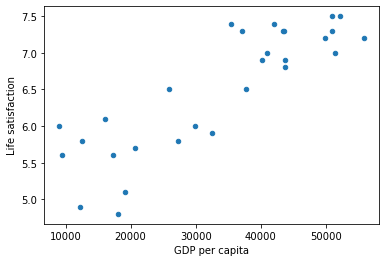

In [8]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [12]:
# Select a linear model
lin_reg_model = sklearn.linear_model.LinearRegression()

In [13]:
# Train the model
lin_reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


Si se hubiera utilizado un algoritmo de aprendizaje basado en instancia en su lugar, habríamos encontrado que Eslovenia tiene el PIB per cápita más cercano al de Chipre (20.732) y, dado que la OCDE nos dice que la satisfacción de vida de Eslovenia es de 5,7, hubiéramos predicho una satisfacción de 5,7 para Chipre. Si nos alejamos un poco y echamos un vistazo a los dos siguientes paises más cercanos, encontraremos a Portugal y España con un índice de satisfacción de vida de 5,1 y 6,5, respectivamente. Promediando estos tres valores obtenemos 5,77 que está bastante cerca de nuestra predicción basada en modelo. Este simple algoritmo se llama regresión de *k-vecinos mas cercanos* (en este ejemplo, k = 3).

Reemplazar el modelo de regresión lineal por una regresión k-vecinos más cercanos en el código anterior es tan fácil como reemplazar esta línea:

    clf = sklearn.linear_model.LinearRegression()
    
por esta otra:

    clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

Si todo salió bien, nuestro modelo realizará buenas predicciones. Si no, puede que necesitemos usar más atributos (ratio de empleo, salud, polución del aire, etc.), obtener más y mejores datos de entrenamiento o quizás seleccionar un modelo más poderoso (por ejemplo, un modelo de Regresión Polinomial.

Como resumen:

- Hemos analizado los datos.
- Hemos seleccionado un modelo.
- Lo hemos entrenado en los datos de entrenamiento (es decir, el algortimo de aprendizaje buscó los valores de los parámetros del modelo que minimizaban una función de coste).
- Finalmente, aplicamos el modelo para llevar a cabo predicciones en nuevos casos (esto se llama *inferencia*), esperando que este modelo generalizara bien.

Así es como se ve un típico proyecto de Machine Learning. Más adelante experimentaremos esto de primera mano yendo a través de un proyecto end-to-end.

Hasta ahora hemos cubierto mucho terreno: ahora sabemos de qué trata realmente Machine Learning, por qué es útil, cuáles son algunas de las categorías más comunes de los sistemas de ML y cuál es el típico flujo de trabajo de un proyecto. Ahora veremos qué puede salir mal en el aprendizaje y a prevenirlo para realizar predicciones precisas.

## Principales desafíos del Machine Learning

En resumen, dado que nuestra principal tarea es seleccionar un algoritmo de aprendizaje y entrenarlo con algunos datos, las dos cosas que pueden ir mal son un "mal algoritmo" y "malos datos". Empecemos con ejemplos de malos datos.

### Cantidad insuficiente de datos de entrenamiento

Para que un niño pequeño aprenda lo que es una manzana, todo lo que necesitamos hacer es señalar una manzana y decir "manzana" (posiblemente tengamos que repetir este procedimientos unas cuantas de veces). Ahora el niño es capaz de reconocer manzanas de todo tipo y colores. Genio.

Machine Learning todavía no está en esas; se necesitan muchos datos para que la mayoría de los algoritmos de Machine Learning funcionen adecuadamente. Incluso para problemas muy simples normalmente necesitarás miles de ejemplos y para problemas complejos como el reconocimiento de imágene y caracteres se pueden necesitar millones de ejemplos (a menos que podamos reusar partes de un modelo existente).

---
**La eficiencia irracional de los datos**

En una [famoso artículo](https://www.aclweb.org/anthology/P01-1005.pdf) publicado en 2001, los investigadores de Microsoft Michele Banko y Eric Brill mostraron que cada algoritmo de Machine Learning diferente, incluyen los bastantes simples, funcionaban de manera casi idénticamente bien en un problema complejo de desambiguación (por ejemplo, saber escribir "tuvo" o "tubo" dependiendo del contexto) de lenguaje natural una vez que recibían suficientes datos, como se puede ver en la siguiente figura:

![importancia_datos](images/ch01/importancia_datos.png)

Como expressaron los autores: "estos resultados sugieren que podríamos reconsiderar la compensación entre gastar tiempo y dinero en desarrollar algoritmos versus gastarlo en el desarrollo de un corpus."

La idea de que importan más los datos que los algoritmos para problemas complejos fue más popularizada por Peter Norvig en un artículo titulado [La eficiencia irracional de los datos](http://goo.gl/q6LaZ8), publicado en 2009. Sin embargo, debe tenerse en cuenta que los conjuntos de datos pequeños y medianos son todavía muy comunes y no es siempre fácil o barato obtener datos de entrenamiento extras, así que no abandonemos los algoritmos por el momento.

---



### Datos de entrenamiento no representativos

Para generalizar correctamente es crucial que nuestros datos de entrenamiento sean representativos de los nuevos casos que queremos generalizar. Esto es cierto tanto para el aprendizaje basado en instancia como para el aprendizaje basado en modelo.

Por ejemplo, el conjunto de paises que usamos anteriormente para el entrenamiento del modelo lineal no era perfectamente representativo; algunos paises estaban ausentes. La siguiente figura muestra cómo se verían los datos cuando se añaden los paises ausentes.

![nonrepresentative](images/ch01/nonrepresentative.png)

Si entrenamos un modelo lineal en estos datos obtendríamos la línea solida, mientras que el modelo antiguo estaría representado por la linea punteada. Como se puede ver, no solo añadir algunos paises ausentes altera significativamente el modelo, sino que parece claro que un modelo lineal simple probablemente nunca va a funcionar del todo bien. Parece que los paises muy ricos no son más felices que los paises moderadamente ricos (de hecho parecen más infelices) y, a la inversa, algunos paises pobres parecen más felices que muchos paises ricos.

Mediante el uso de un conjunto de entrenamiento no representativo, entrenamos un modelo que es poco probable que realice predicciones precisas, especialmente para los paises muy pobres y muy ricos.

Es crucial usar un conjunto de entrenamiento que sea representativo de los casos que queremos generalizar. A menudo es más difícil de lo que parece: si la muestra es demasiado pequeña tendremos *ruido de muestreo* (es decir, datos no representativos como resultado de la casualidad), pero incluso las muestra muy grandes pueden no ser representativas si el método de muestreo es defectuoso. Esto se denomina *sesgo de muestreo*.

---
**Un famoso ejemplo de sesgo de muestreo**

Quizás el más famoso ejemplo de sesgo de muestreo sucedió durante las elecciones presidenciales de EEUU en 1936, que enfrentó a Landon contra Roosevelt: el *Literary Digest* llevó a cabo una gran encuesta, enviando correos a unos 10 millones de personas. Obtuvo 2,4 millones de respuestas y predijo con una alta confianza que Landon conseguiría el 57% de los votos. En su lugar, Roosevelt ganó con un 62% de los votos. El fallo estaba en el método de muestreo del *Literary Digest*:

- En primer lugar, para obtener las direcciones a las que enviar las encuestas, el *Literary Digest* usó directorio telefónicos, listas de subscriptores de revistas, listas de miembros de clubs y similares. Todas estas listas tienden a favorecer a las personas más ricas, aquellas que tienen más probabilidades de votar a los Republicanos (Landon).

- En segundo lugar, contestaron menos del 25% de las personas que recibieron la encuesta. De nuevo, esto introdujo un sesgo de muestreo, al descartar a personas que no se preocupan mucho de los políticos, personas a las que no les gusta el *Literary Digest* y otros grupos clave. Este tipo especial de sesgo de muestreo se denomina *sesgo de no respuesta*.

Aqui tenemos otro ejemplo: digamos que queremos construir un sistema para reconocer videos de música funk. Una forma de construir nuestro conjunto de entrenamiento es buscar "musica funk" en YouTube y usar los videos resultantes. Pero esto asume que el motor de búsqueda de YouTube devuelve un conjunto de videos que son representativos de todos los videos de música funk de YouTube. En realidad, los resultados de la búsqueda estén sesgados hacia artistas populares (y si vivimos en Brasil obtendremos muchos de "funk carioca" que no suenan como James Brown). Por otro lado, ¿Cómo podemos obtener un gran conjunto de entrenamiento? 

---

### Datos de pobre calidad

Obviamente, si nuestros datos de entrenamiento están repletos de errores, valores atípicos y ruido (por ejemplo, debido a mediciones de baja calidad), será más difícil para el sistema detectar los patrones subyacentes, por lo que será menos probable que nuestro sistema se ejecute correctamente. A menudo vale la pena invertir tiempo en limpiar nuestros datos de entrenamiento. La verdad es que la mayoría de los científicos de datos invierten un parte significativa de su tiempo haciendo sólo esto. Por ejemplo:

- Si algunas instancias son claramente valores atípicos, puede ser útil simplemente descartarlas o intentar corregir los errores manualmente.

- Si a algunas instancias les faltan unas cuantas características (por ejemplo, un 5% de nuestros clientes no especifican su edad), debemos decidir si ignoramos este atributo totalmente, ignorar estas instancias, rellenar los valores faltantes (por ejemplo con la edad media) o entrenar un modelo con la característica y otro sin ella, y así sucesivamente.

### Características irrelevantes

Como se suele decir, datos de entrada defectuosos generan datos de salida defectuosos. Nuestro sistema sólo será capaz de aprender si los datos de entrenamiento contienen suficientes características relevantes y no demasiadas irrelevantes. Una parte crítica del éxito de un proyecto de Machine Learning es crearse con un buen conjunto de características para entrenarse. Este proceso, llamado *ingeniería de características* (feature engineering), implica:

- *Selección de características*: seleccionar las características más útiles para entregar de entre todas las existentes.
- *Extracción de características*: combinas las características existentes para producir una más útil (como vimos anteriormente, el algoritmo de reducción de la dimensionalidad puede ayudar).
- Creación de nuevas características mediante la recopilación de nuevos datos.

Ahora que hemos visto muchos ejemplos de datos malos, echemos un vistazo a un par de ejemplos de malos algoritmos.

### Sobreajuste de los datos de entrenamiento

Digamos que estamos visitando un pais extranjero y el taxista nos estafa. Podríamos estar tentados de decir que *todos* los taxistas de ese país son unos ladrones. La sobregeneralización es algo que los humanos hacemos a menudo y, desafortunadamente, las máquinas pueden caer tambien en la misma trampa si no somos cuidadosos. En Machine Learning esto se denomina *sobreajuste* (overfitting): significa que el modelo funciona bien en los datos de entrenamiento pero no generaliza bien.

En la siguiente figura se muestra un ejemplo de modelo de satisfacción de vida polinomial de alto grado que se sobre ajusta fuertemente a los datos de entrenamiento. A pesar de que funciona mucho mejor en los datos de entrenamiento que el modelo lineal simple, ¿realmente confiaría en sus predicciones?

![overfitting](images/ch01/overfitting.png)

Los modelos complejos como las redes neuronales profundas pueden detectar patrones sutiles en los datos, pero si el conjunto de entrenamiento es ruidoso o si es demasiado pequeño (lo que introduce ruido de muestreo) entonces es probable que el modelo detecte patrones en el ruido mismo. Obviamente estos patrones no generalizarán a nuevas instancias. Por ejemplo, digamos que proporcionamos a nuestro modelo de satisfacción de vida muchos más atributos, incluyendo otros no informativos como el nombre del país. En este caso, un modelo complejo puede detectar patrones como el hecho de que todos los paises en los datos de entrenamiento que contengan una *w* en su nombre tienen una satisfacción mayor de 7: New Zealand (7,3), Norway (7,4), Sweden (7,2) y Switzerland (7,5). ¿Cómo de seguros estaríamos de que esta regla generalizara a Rwanda o Zimbabwe? Obviamente este patrón ocurre en los datos de entrenamiento por pura casualidad, pero el modelo no tiene forma de decir si un patrón es real o simplemente es el resultado de ruido en los datos.

El sobreajuste sucede cuando el modelo es demasiado complejo en relación a la cantidad y el ruido de los datos de entrenamiento. Las posibles soluciones son:

 - Simplificar el modelo selecccionado uno con menos parámetros (por ejemplo, un modelo lineal en lugar de un modelo polinomial de alto grado), reduciendo el número de atributos en los datos de entranamiento o restringiendo el modelo.
 - Recopilando más datos de entrenamiento.
 - Reduciendo el ruido en los datos de entrenamiento (por ejemplo, corrigiendo errores de los datos y eliminando valores atípicos).
 
Reducir el modelo para simplificarlo y disminuir el riesgo de sobreajuste se denomina *regularización*. Por ejemplo, el modelo lineal que definimos anteriormente tenía dos parámetros, θ$_0$ y θ$_1$. Esto nos da un algoritmo de aprendizaje de dos *grados de libertad* para adaptar el modelo a los datos de entrenamiento: podemos ajustar tanto la altura (θ$_0$) como la pendiente (θ$_1$) de la línea. Si forzamos θ$_0$ = 0, el algoritmo tendría solo un grado de libertad y sería mucho más difícil ajustar los datos adecuadamente: todo lo que podría hacer es mover la línea arriba y abajo para acercarse lo más posible a las instancias de entrenamiento, para que terminara alrededor de la media. Un modelo muy simple, de hecho. Si permitimos al algoritmo modificar θ$_1$ pero lo forzamos a mantenerlo pequeño, entonces el algoritmo de aprendizaje tendrá efectivamente entre uno y dos grados de libertad. Producirá un modelo más simple que con dos grados de libertad, pero más complejo que con solo uno. Queremos encontrar el equilibrio ideal entre ajustar perfectamente los datos y mantener el modelo lo suficientemente simple para asegurar que generalizá correctamente.

La siguiente figura muestra tres modelos: la linea punteada representa el modelo original que ha sido entrenado con unos cuantos paises ausentes, la línea de rayas es nuestro segundo modelo entrenado con todos los paises y la línea sólida es un modelo lineal entrenado con los mismos datos que el primer modelo pero aplicándole una regularización. Podemos ver que la regularización obliga al modelo a tener una menor pendiente, que se ajusta un poco menos a los datos de entrenamiento, pero que actualmente permite generalizar mejor a nuevos ejemplos.

![regularizacion](images/ch01/regularizacion.png)

La cantidad de regularización a aplicar durante el aprendizaje puede ser controlada por un *hiperparámetro*. Un hiperparámetro es un parámetro del algoritmo de aprendizaje (no del modelo). Como tal, no se ve afectado por el algoritmo de aprendizaje en sí mismo. Debe establecerse previamente al entrenamiento y permanece constante durante el mismo. Si establecemos el hiperparámetro de regularización a un valor muy alto, obtendremos un modelo casi plano (una pendiente próxima a cero); el algoritmo de aprendizaje seguramente no sobreajuste los datos de entrenamiento, pero será menos probable que encuentre una buena solución. El ajuste de hiperparámetros es un parte importante en la construcción de los sistemas de Machine Learning (vermos un ejemplo detallado en capítulos posteriores).

### Subajuste de los datos de entrenamiento

Como se puede suponer, el *subajuste* (underfitting) es lo contrario del sobreajuste: ocurre cuando nuestro modelo es demasiado simple para aprender la estructura subyacente de los datos. Por ejemplo, un modelo lineal de satisfacción de vida es propenso al subajuste; la realidad es simplemente más compleja que el modelo, así que sus predicciones serán obligadamente inexactas, incluso en los datos de entrenamiento.

Las principales opciones para corregir este problema son:

- Seleccionar un modelo más poderoso, con más parámetros
- Proporcionar mejores características al algoritmo de aprendizaje (ingeniería de características)
- Reducir las restricciones en el modelo (por ejemplo, reducir el hiperparámetro de regularización)

### Un paso atrás

A estas alturas ya sabemos mucho de Machine Learning. Sin embargo, pasamos por tantos conceptos que nos podemos sentir un poco perdidos, así que demos un paso atrás y echemos un vistazo global:

- El Machine Learning trata de hacer que las máquina mejoren en algunas tareas aprendiendo de los datos, en lugar de tener que codificar explícitamente las reglas.

- Hay muchos tipos diferentes de sistemas de ML: supervisados o no, por lotes u online, basados en instancia o basados en modelo, y así sucesivamente.

- En un proyecto de ML recopilamos datos en un conjunto de entrenamiento y proporcionamos dicho conjunto al algoritmo de aprendizaje. Si se trata de un algoritmo basado en modelo se afinan algunos parámetros para ajustar el modelo a los datos de entrenamiento (para hacer buenas predicciones en el conjunto de entrenamiento en sí mismo) y entonces se espera que sea capaz de hacer buenas predicciones en nuevos casos igual de bien. Si se trata de un algoritmo basado en instancia, solo aprende los ejemplos de memoria y generaliza a nuevas instancias comparando las instancias aprendidas usando una medida de similitud.

- El sistema no rendirá bien si nuestro conjuntos de entrenamientos con demasiado pequeños o si los datos no son representativos, ruidosos o poblados de características irrelevantes (la basura que entra es la basura que sale). Por último, nuestro modelo necesita no ser demasiado simle (en cuyo caso estaría subajustado) ni demasiado complejo (en cuyo caso estaría sobreajustado).

Solo hay un último tema importante que tratar: una vez que hemos entrenado un modelo, no queremos "esperar" que solo generalice a nuevos casos. Queremos evaluarlo y afinarlo si es necesario. Veamos cómo.

## Prueba y validación

La única forma se saber cómo de bien generalizará un modelo a nuevos casos en probarlo en nuevos casos. Un manera de hacer esto es implantar el modelo en producción y monitorizar su rendimiento. Esto funciona bien, pero si nuestro modelo es terriblemente malo, los usuario se quejarán, lo cual no es la mejor idea.

Una opción mejor es dividir los datos en dos conjuntos: el *conjunto de entrenamiento* y el *conjunto de prueba*. Como sus nombres indican, entrenamos el modelo usando el conjunto de entrenamiento y lo probamos usando el conjunto de prueba. El ratio de error en los nuevos casos se denomina *error de generalización* o error fuera de la muestra (*out-of-sample error*) y al evaluar el modelo en el conjunto de prueba obtenemos una estimación de este error. Este valor nos dice cómo de bien se ejecutará nuestro modelo en instancias que nunca ha visto antes.

Si el error de entrenamiento es bajo (es decir, nuestro modelo produce pocos errores en el conjunto de prueba) pero el error de generalización es alto, significa que nuestro modelo está sobreajustando los datos de entrenamiento.

Es algo común usar el 80% de los datos para entrenamiento y mantener el 20% restante para probar. Sin embargo, depende del tamaño del conjunto de datos: si contiene 10 millones de instancias, entonces mantener un 1% significa que nuestro conjunto de prueba contendría 100.000 instancias, lo que probablemente es más que suficiente para obtener una buena estimación del error de generalización.

### Ajuste de hiperparámetros y selección de modelo

Por lo tanto, evaluar un modelo es bastante simple: solo hay que usar un conjunto de prueba. Ahora supongamos que estamos dudando entre dos modelos (por ejemplo, un modelo lineal y un modelo polinomial): ¿Cómo podemos decidirnos?. Una opción sería entrenar ambos y comparar cómo de bien generalizan usando el conjunto de prueba.

Ahora supongamos que el modelo lineal generaliza mejor, pero que queremos aplicar alguna generalización para evitar el sobreajuste. La pregunta es: ¿Cómo elegir el valor del hiperparámetro de regularización? Una opción sería entrenar 100 modelos diferentes usando 100 valores diferentes para este hiperparámetro. Supongamos que encontramos el mejor valor del hiperparámetro que produce un modelo con el menor error de generalización, digamos que sólo el 5% de error.

Así que implantamos este modelo en producción, pero desafortunadamenteno se ejecuta también como esperábamos y provoca un 15% de errores. ¿Qué ha pasado?

El problema es que medimos el error de generalización múltiples veces en el conjunto de prueba y adaptamos el modelo y los hiperparámetros para generar el mejor modelo *para este conjunto en particular*. Esto significa que el modelo es improbable que se ejecute bien en nuevos datos.

Una solución común a este problema se denomina *holdout validation* (método de retención): simplemente reservamos una parte del conjunto de entrenamiento para evaluar diversos modelos candidatos y seleccionar el mejor. Este nuevo conjunto de reserva se denomina *conjunto de validación* (o algunas veces *conjunto de desarrollo*). Más específicamente, entrenamos múltiples modelos con varios hiperparámetros en el conjunto reducido de entrenamiento (es decir, el conjunto de entrenamiento completo menos el conjunto de validación) y seleccionamos el modelo que se ejecute mejor en el conjunto de validación. Después de este proceso de validación de reserva, entrenamos el mejor modelo en el conjunto de entrenamiento completo (incluyendo el conjunto de validación), donde obtenemos el modelo final. Por último, evaluamos este modelo final en el conjunto de prueba para obtener una estimación del error de generalización.

Esta solución funciona muy bien generalmente. Sin embargo, si el conjunto de validación es demasiado pequeño las evaluaciones del modelo serán imprecisas: podemos terminar seleccionando un modelo subóptimo por error. Y viceversa, si el conjunto de validación es demasiado grande, el conjunto de entrenamiento restante será mucho más pequeño que el conjunto de entranamiento completo. ¿Por qué es esto malo? Bueno, dado que el modelo final se entrenará en el conjunto de entrenamiento completo, no es lo ideal comparar modelos candidatos entrenados en un conjunto de entrenamiento mucho más pequeño. Sería como seleccionar el velocista más rápido para participar en una maratón. Una forma de resolver este problema es ejecutar una *validación cruzada* (cross-validation) repetidas veces, usando muchos conjuntos pequeños de validación. Cada modelo se evalúa una vez por conjunto de validación y después se entrena en el resto de los datos. Promediando todas las evaluaciones de un modelo obtenemos una medida mucho más precisa de su rendimiento. Sin embargo, hay un inconveniente: el tiempo de entrenamiento se multiplica por el número de conjuntos de validación.

### Desajuste de datos

En algunos casos, es fácil obtener una gran cantidad de datos de entrenamiento, pero no es perfectamente representativo de los datos que se usarán en producción. Por ejemplo, supongamos que queremos crear una app para móvil que tome fotografías de flores y determine automáticamente su especie. Podemos descargar fácilmente millones de fotografías de flores desde la web, pero no serán prefectamente representativas de las fotografías que tomaremos usando la app desde el dispositivo móvil. Quizás solo tengamos 10.000 fotografías representativas (es decir, tomadas con la app). En este caso, la regla más importante que debemos recordar es que el conjunto de validación y el de prueba deben ser tan representativos como sea posible de los datos que esperamos usar en producción, por lo que deben estar compuestos exclusivamente por fotografías representativas: podemos mezclarlas y poner la mitad en el conjunto de validación y la otra mitad en el conjunto de prueba (asegurándonos de que los duplicados o casi duplicados no terminen en ambos conjuntos). Tras entrenar nuestro modelo en las fotografías de la web, si observamos que la ejecución de nuestro modelo en el conjunto de validación es decepcionante no sabremos si es a causa de que el modelo está sobreajustado en el modelo de entrenamiento o es solo debido a desajustes entre las fotografías de la web y las de la app móvil. Una solución es reservar parte de las fotografías de entrenamiento (de la web) en otro conjunto que Andrew Ng denomina *conjunto de entrenamiento-desarrollo* (train-dev set). Después de entrenado el modelo (en el conjunto de entrenamiento, *no* en el de entrenamiento-desarrollo), podemos evaluarlo en el conjunto de entrenamiento-desarrollo: si se ejecuta bien entonces el modelo no está sobreajustado en el conjunto de entrenamiento, por lo que si funciona mal en el conjunto de validación el problema debe venir de un desajuste de datos. Podemos intentar abordar este problema preprocesando las imágenes de la web para hacer que se parezcan más a las fotografías que se tomarán desde la app móvil, y posteriormente reentrenar el modelo. Y viceversa, si el modelo se ejecuta pobremente en el conjunto de entrenamiento-desarrollo, el modelo estará sobreajustado en el conjunto de entrenamiento y deberíamos intentar simplificarlo o regularizarlo, recopilando más datos de entrenamiento y limpiándolos, como discutimos anteriormente.

---
**Teorema de "No hay almuerzo gratis"**

Un modelo es una versión simplificada de las obervaciones. Las simplificaciones están destinadas a descartar detalles superfluos que son poco probables que se generalicen a nuevas instancias. Sin embargo, para decidir qué datos descartar y cuáles mantener debemos hacer *asunciones*. Por ejemplo, un modelo lineal hace la asunción de que los datos son fundamentalmente lineales y que la distancia entre las instancias y la línea recta es sólo ruido, el cual puede ser ignorado de forma segura.

En un [famoso artículo de 1996](https://homl.info/8), David Wolpert demostró que si no hacemos absolutamente ninguna asunción sobre los datos, no hay razón alguna para preferir un modelo sobre cualquier otro. Esto se denomina teorema de "No almuerzo gratis" (NFL, del inglés *No Free Lunch*). Para algunos conjuntos de datos el mejor modelo es el modelo lineal, mientras que para otros conjuntos de datos es una red neuronal. No hay un modelo que *a priori* garantice trabajar mejor (de ahí el nombre del teorema). La única forma de saber con seguridad qué modelo es mejor es evaluar todos ellos. Dado que nos es posible, en la práctica haremos algunas asunciones razonables sobre los datos y evaluaremos solo unos cuantos modelos. Por ejemplo, para tareas simples podemos avaluar modelos lineales con varios niveles de regularización y, para modelos complejos, podemos evaluar varias redes neuronales.

---